![Banner](img/banner.png)

# **Actividad No.3:** Descenso de Gradiente Estocástico

***Matemáticas para Machine Learning***.

**Semana 6 - Lección 3:** Mínimos locales y globales de una función.

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *Sergio David Salazar Isairias*

# Introducción

## Descripción

El presente *jupyter notebook* contine todo el material para el desarrollo de la actividad 3 de la semana 6 del curso ***Matemáticas para Machine Learning***, correspondiente a la lección 3: Descenso de gradiente estocástico. En este se utilizará el conocimiento adquirido para implementar el algoritmo de descenso de gradiente estocástico.

**Objetivos de Aprendizaje:**

*   Implementar el algoritmo de descenso de gradiente estocástico.

## Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o esten solo igualadas a None, complete la asignación).

# Teoría

Recordemos el concepto de regresión lineal en multiples variables, introducido la semana pasada. Este modelo matemático busca aproximar la relación entre una variable independiente ($x$) y una dependiente ($y$) a partir de unos parámetros ($W$).

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b = W^TX + b
\end{equation}

Donde $\hat{y}$ corresponde a la estimación de la variable dependiente, a partir de los datos $x$ y los parámetros $W$.

Es común definir $x_0 = 1$ y $w_0 = b$, con esta convención la fórmula de regresión se simplifica a:

\begin{equation}
\hat{y} = W^TX
\end{equation}

En este taller usted estimará los parámetros $W$, que produzcan la mejor estimación de $y$ a partir de los datos $x$. No obstante, y a diferencia de la semana pasada, está vez lo hará utilizando una aproximación diferente: Decenso de gradiente estocástico.

## Gradiente Estocástico

Igual que en el taller de la Semana 5, se desea estimar los parámetros $\hat{W}$ que mejor ajusten la relación entre $x$ y $y$. Para esto, usted va a querer minimizar el la diferencia entre el dato ($y$) y la estimación del dato ($\hat{y}$). De forma más especifica usted va a querer minimizar la diferencia cuadrada, es decir:

\begin{align}
E(W) &= (Y - \hat{Y})^2 \\
&= (Y - W^T X)^2 
\end{align}

Note que esta función de error cuadrático únicamente depende de $W$, pues los $X$ y los $Y$ son los datos que se van a utlizar para ajustar la regresión. Ahora bien, en esta ocación usted va a iniciar con un valor inicial aleatorio para $\hat{W}$ e irá actualizando dicho valor, tal que se minimice este error. 

-----------------------------
__¿Cómo?__

Actualizando $\hat{W}$ en la dirección en la que minimice el error, es decir, en la diricción contraria al gradiente de $E(W)$. Así las cosas, lo que se desea es implementar el algoritmo de Descenso de Gradiente (GD):

-----------------------------
-----------------------------
Inicialice $w_0$

repeat

$w_{k+1} = w_k - \alpha \bigtriangledown E(w)$
    
until Condición de terminación.

-----------------------------

Donde,

*   $\alpha$ será el tamaño del paso (también conocido como tasa de aprendizaje).
*   $\bigtriangledown E(w)$ será el gradiente del error, el cual en el caso estocástico será estimado a partir de una pequeña muestra de los datos o incluso a partir de un único dato en el caso extremo:

\begin{equation}
\bigtriangledown E(w) \approx (W^T x_i - y_i)x_i
\end{equation}

De esta manera, usted buscará implementar este algoritmo, de manera estocástica (utilizando un muestra o _mini-batch_ de los datos) a lo largo de este taller.

# Inicialización

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Ejemplo de Regresión Lineal

## Datos

In [2]:
# Cargar datos de los carros
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [3]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

## Codificación de los datos

Las variables no númericas que permiten discriminar la información del *data_Set* se conocen como variables categoricas. Dada su naturaleza es necesario realizar una codificación de estas, es decir, atribuirles valores numericos. Una técnica de codificación es _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

In [4]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Observe que el nuevo *data_Set* tiene más columnas que el *data_Set* original, esto se debe a que el método de codificación genera una variable binaria para cada modelo de automóvil.

## Separación de datos

Separar los datos para el entrenamiento del modelo y para su comprobación. Se utiliza el $80\%$ de los datos para estimar los parámetros.

In [5]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

## Modelo y medidas de desempeño

In [6]:
# Definir el modelo de regresión lineal
model_1 = LinearRegression()

# Estimación de parámetros
model_1.fit(X_train, y_train)

# Predecir los valores de la variable dependiente (Y)
preds = model_1.predict(X_test)

# Medidas de desempeño
rmse = np.sqrt(mean_squared_error(y_test, preds))
rs = model_1.score(X_test, y_test)

print(f'RMSE: {round(rmse,3)}')
print(f'R^2: {round(rs,3)}\n')

RMSE: 0.031
R^2: 0.917



A partir de las métricas obtenidas se concluye que el modelo tuvo un buen desempeño. Respecto al RMSE, su valor es cercano a cero, lo cual se relaciona con una diferencia baja entre los valores reales y los estimados. Además, el $R^2$ es cercano a 1, es decir, el modelo tiene un buen ajuste a los datos.

# Regresión Lineal Estocástica

## Codificación de los datos

In [7]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

## Separación de datos

In [8]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [9]:
X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

## Estimación de Parámetros

In [10]:
# CICLO ENTRENAMIENTO
def estimar_parametros(X,Y,n_muestra=10,alpha=0.00001, max_iter=1000, epsilon=0.0001):
    W = np.random.random_sample((X.shape[1],))
    e_historial = []
    for i in range(max_iter):
        # Seleccionar una muestra aleatoria
        indices = np.random.choice(len(X), size=n_muestra)
        X_muestra = X[indices,:]

        # Calculo de gradiente para la muestra
        gradiente = np.zeros((X.shape[1],))
        for x, i in zip(X_muestra, indices):
            g = (np.dot(x, W) - y[i])*x
            gradiente += g

        # Actualizar parametros
        prev_w = W.copy()
        W = prev_w - alpha*gradiente/n_muestra

        # Calculo de error
        y_pred = np.dot(X,W)
        error = mean_squared_error(Y, y_pred)
        e_historial.append(error)

        # Condición de parada
        if np.linalg.norm(W - prev_w) < epsilon:
                break
    return [e_historial,W]

In [11]:
def plot_errores_alpha(ts:list):
    plt.figure(figsize=(15,5))
    ws = []
    for i in ts:
        modelo = estimar_parametros(X_train_array,y_train_array,alpha=i)
        errores = modelo[0]
        ws.append(modelo[1])
        plt.plot(errores,label=f'{i}')

    plt.legend(title="Variación de $alpha$",loc='upper center',bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True,ncol=4)
    plt.title('Evolución del error de entrenamiento')
    plt.xlabel('Iteraciones')
    plt.ylabel('Error medio cuadrático (MSE)')
    plt.grid(True)
    plt.show()
    return ws

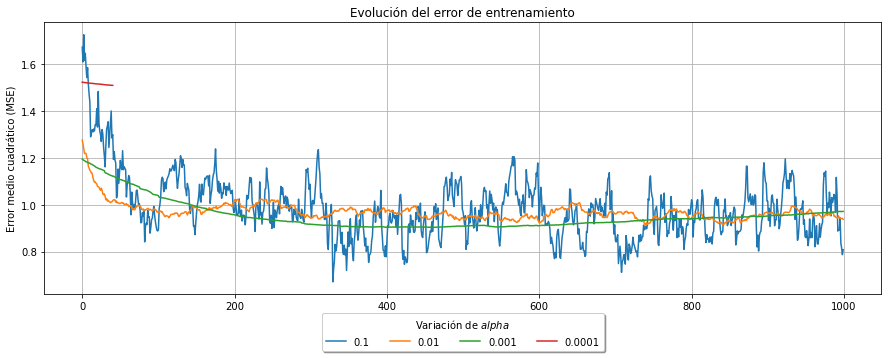

In [12]:
ts = [1e-1,1e-2,1e-3,1e-4]
ws =plot_errores_alpha(ts)

## Predicción del modelo

In [30]:
y_test_preds = np.zeros(y_test_array.shape)
print(f'Iteración,R^2')
for j in range(len(ts)):
    for i in range(X_test_array.shape[0]):
        y_test_preds[i] = np.dot(ws[j],X_test_array[i])
    r2 = r2_score(y_test_array, y_test_preds)
    print(f'     {j+1}  {round(r2,4)}')

Iteración,R^2
     1  -0.0056
     2  -0.1151
     3  -0.4094
     4  -1.218


# Análisis de Resultados

Realice variaciones en la lista *ts* y en el número máximo de iteraciones, obtenga la gráfica de evolución del error. ¿Hay alguna relación entre la tasa de aprendizaje $\alpha$ y la convergencia del algoritmo de *Descenso de Gradiente*? Explique su respuesta.

In [ ]:
ts = ts
plot_errores_alpha(ts)

**Respuesta:**

Para garantizar la convergencia del algoritmo la tasa de aprendizaje $\alpha$ debe tener un valor considerablemente alto ¿Verdadero o Falso? Explique su respuesta.

**Respuesta:**

Explique aspectos positivos y negativos del algoritmo de *Descenso de Gradiente Estocástico*.

**Respuesta:**